<a href="https://colab.research.google.com/github/Educat8n/AI-Development-Oxford/blob/main/boston_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
%%writefile boston_house_price_prediction.py



# Step -1 - Import Packages
import pandas as pd
from sklearn.datasets import load_boston
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn import metrics
plt.rcParams["figure.figsize"] = (10, 10)

from sklearn.neural_network import MLPRegressor

# Step - 2 - Define the main function
def main():
    # Get data

    ### To Do Assignment: try changing the data from Boston housing to California housing dataset 
    ### You can load the datasets as follows::
    ###  Refer this link for more detatils: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()
    housing_X = pd.DataFrame(housing.data, columns = housing.feature_names)
    housing_y = housing.target
    features = housing.feature_names
    
    ## Data Exploration
    print(f'The features in dataset are: {features}')
    #print(f'Data description\n {boston_X.describe()}')
    
    #Plots
    plot_data(housing_X, housing_y, features, cor=True)

    ## Remove Outliers
    housing_X, housing_y = remove_outliers(housing_X, housing_y, features)
    
    X_train, y_train, X_test, y_test = preprocess(housing_X, housing_y, features)

    model = SVR() 

    model = train(model, X_train, y_train)

    evaluate(model, X_test, y_test, bl= True)

    best_params = optimize_models(X_train, y_train)
    print('best_params')
    print(best_params)

    # # ## Build Best Model
    best_solver = best_params['solver']
    best_max_iter = best_params['max_iter']
    best_learning_rate_init = best_params['learning_rate_init']

    best_model = MLPRegressor(learning_rate_init = best_learning_rate_init, max_iter = best_max_iter, solver = best_solver)
    best_model = train(best_model, X_train, y_train)
    evaluate (best_model, X_test, y_test)
 
# Step - 3 - Plot graphs to understand data
def plot_data(x_df, y_df,features, cor=False):
    X = x_df.values
    plt.figure(figsize=(10,10))
    plt.title("Price Distribution")
    plt.hist(y_df, bins=30)
    plt.show()
    #cols = x_df.columns()
    fig, ax = plt.subplots(1, len(features), sharey=True, figsize=(20,5))
    plt.title("Relationship between different input features and price")
    ax = ax.flatten()
    for i, col in enumerate(features):
        x = X[:,i]
        y = y_df
        ax[i].scatter(x, y, marker='o')
        ax[i].set_title(col)
        ax[i].set_xlabel(col)
        ax[i].set_ylabel('MEDV')
    plt.show()

    if cor:
      pass
      ### To Do Add the code to find and display correlation among
      ### different features




# Step - 4 - Preprocess data
# Step -4a : Remove outliers
def remove_outliers(x,y, features):
    #remove null
    x_df = x.copy(deep=True)
    x_df['MEDV'] = y
    x_df.dropna(inplace=True)
    return x_df[features], x_df['MEDV']
    
    
# Step -4b : Normalize data
from sklearn.preprocessing import MinMaxScaler
def scale_numeric(df):
    x = df.values 
    scaler = MinMaxScaler()
    ### To Do Assignment instead of StandardScaler use MinMaxscaler, 
    ### Also observe if scaling influences the results
    x_scaled = scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    return df

    

# Step -4b : Preprocess data
def preprocess(x, y, features):
    x_df = x[features].copy(deep=True)
    x_df = scale_numeric(x_df)
    #print(len(x_df),len(y))
    # Split data into train, test
    X_train, X_test, y_train, y_test = train_test_split(x_df,y, test_size=0.3, random_state=1)
    return X_train, y_train, X_test, y_test
    
    
    
    
# Step - 5 - train model 
def train(model,X_train, y_train):
    model.fit(X_train, y_train)
    return model
    
    
# Step - 6 - Evaluate Model
def evaluate(model, X_test, y_test, plot = True, print_results=True, bl=False):
    y_pred = model.predict(X_test)
    if print_results:
      if bl:
        print('\n\nBaseline Model Performance on Test Dataset:\n')
      else:
        print('\n\nBest Model Performance on Test Dataset:\n')
      print('R^2:',metrics.r2_score(y_test, y_pred))
      print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
      print('MSE:',metrics.mean_squared_error(y_test, y_pred))
      print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

    if plot:
      plt.scatter(y_test, y_pred)
      plt.xlabel("Prices")
      plt.ylabel("Predicted prices")
      plt.title("Prices vs Predicted prices")
      plt.show()
    return 
    
    
    
    
# Step - 7 - Improve Model
def optimize_models(X_train, y_train):
  ### To Do Assignment Change the model to MLP  and accordiongly change Grid search params
  model = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000)
  params = {'solver':['lbfgs','sgd','adam'], 'max_iter':[500,1000], 'learning_rate_init': [0.1,0.01]} # 'lbfgs','sgd',
  clf = GridSearchCV(model, params)
  clf.fit(X_train, y_train)
  return (clf.best_params_)


# call the main finction
if __name__ == '__main__':
    main()
    
    
    

Overwriting boston_house_price_prediction.py


The features in dataset are: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


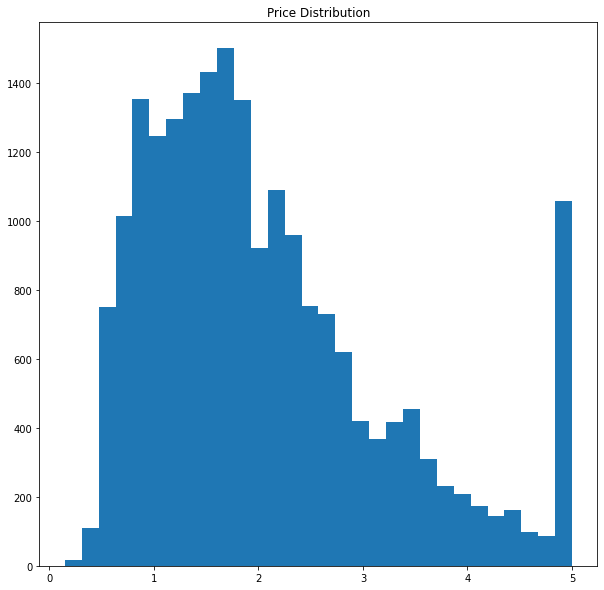

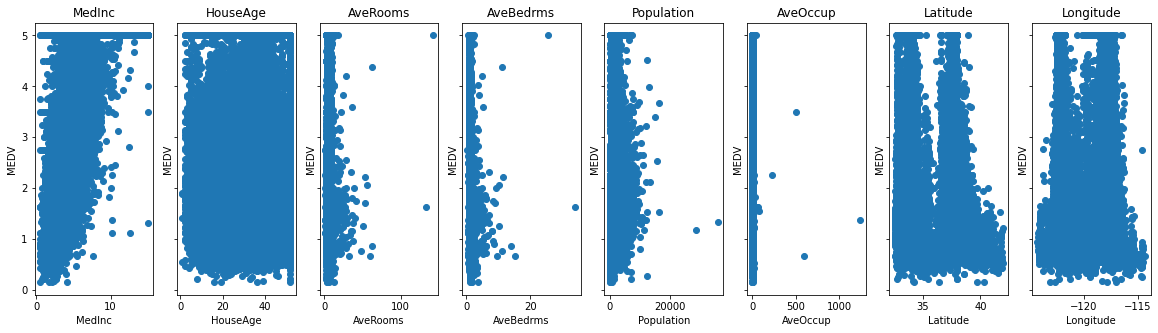



Baseline Model Performance on Test Dataset:

R^2: 0.6535770743100294
MAE: 0.4531254559652445
MSE: 0.4554363581138271
RMSE: 0.6748602508029549


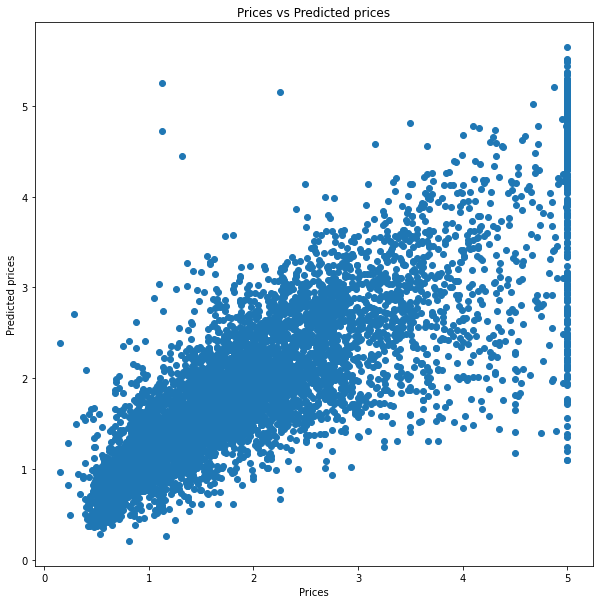

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

best_params
{'learning_rate_init': 0.01, 'max_iter': 500, 'solver': 'adam'}


Best Model Performance on Test Dataset:

R^2: 0.6931376005192795
MAE: 0.4256075211725208
MSE: 0.4034268037636859
RMSE: 0.6351588807248828


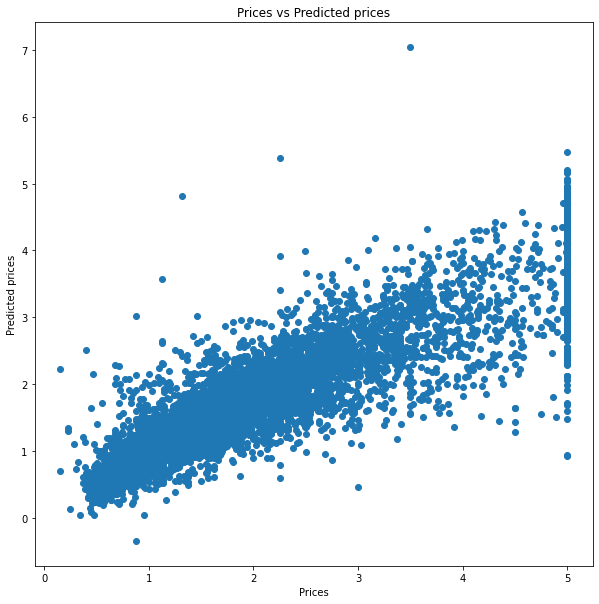

<Figure size 720x720 with 0 Axes>

In [15]:
%run boston_house_price_prediction.py